In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial.distance import pdist, squareform


In [2]:
file_path = "/Users/owlxshri/Desktop/coral reef/mlpr-project/statisticalinf/finaldata.csv"
df = pd.read_csv(file_path)

In [17]:
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                1200 non-null   int64  
 1   Month               1200 non-null   int64  
 2   Reef Name           1200 non-null   object 
 3   SST_MIN             1200 non-null   float64
 4   SST_MAX             1200 non-null   float64
 5   SST@90th_HS         1200 non-null   float64
 6   SSTA@90th_HS        1200 non-null   float64
 7   DHW_from_90th_HS>1  1200 non-null   float64
 8   Salinity            1200 non-null   float64
 9   pH_total            1200 non-null   float64
 10  pCO2                1200 non-null   float64
 11  fCO2                1200 non-null   float64
 12  IOD                 1200 non-null   float64
 13  ENSO                1200 non-null   float64
 14  Bleaching           1200 non-null   float64
 15  Genera              1200 non-null   objec

In [18]:
missing_threshold = 0.3  # Drop columns with more than 30% missing values
df = df.dropna(axis=1, thresh=int(missing_threshold * len(df)))
print("Remaining columns after dropping those with >30% missing values:", df.columns)
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill remaining missing values with median

Remaining columns after dropping those with >30% missing values: Index(['Year', 'Month', 'Reef Name', 'SST_MIN', 'SST_MAX', 'SST@90th_HS',
       'SSTA@90th_HS', 'DHW_from_90th_HS>1', 'Salinity', 'pH_total', 'pCO2',
       'fCO2', 'IOD', 'ENSO', 'Bleaching', 'Genera'],
      dtype='object')


In [19]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicate rows: 0


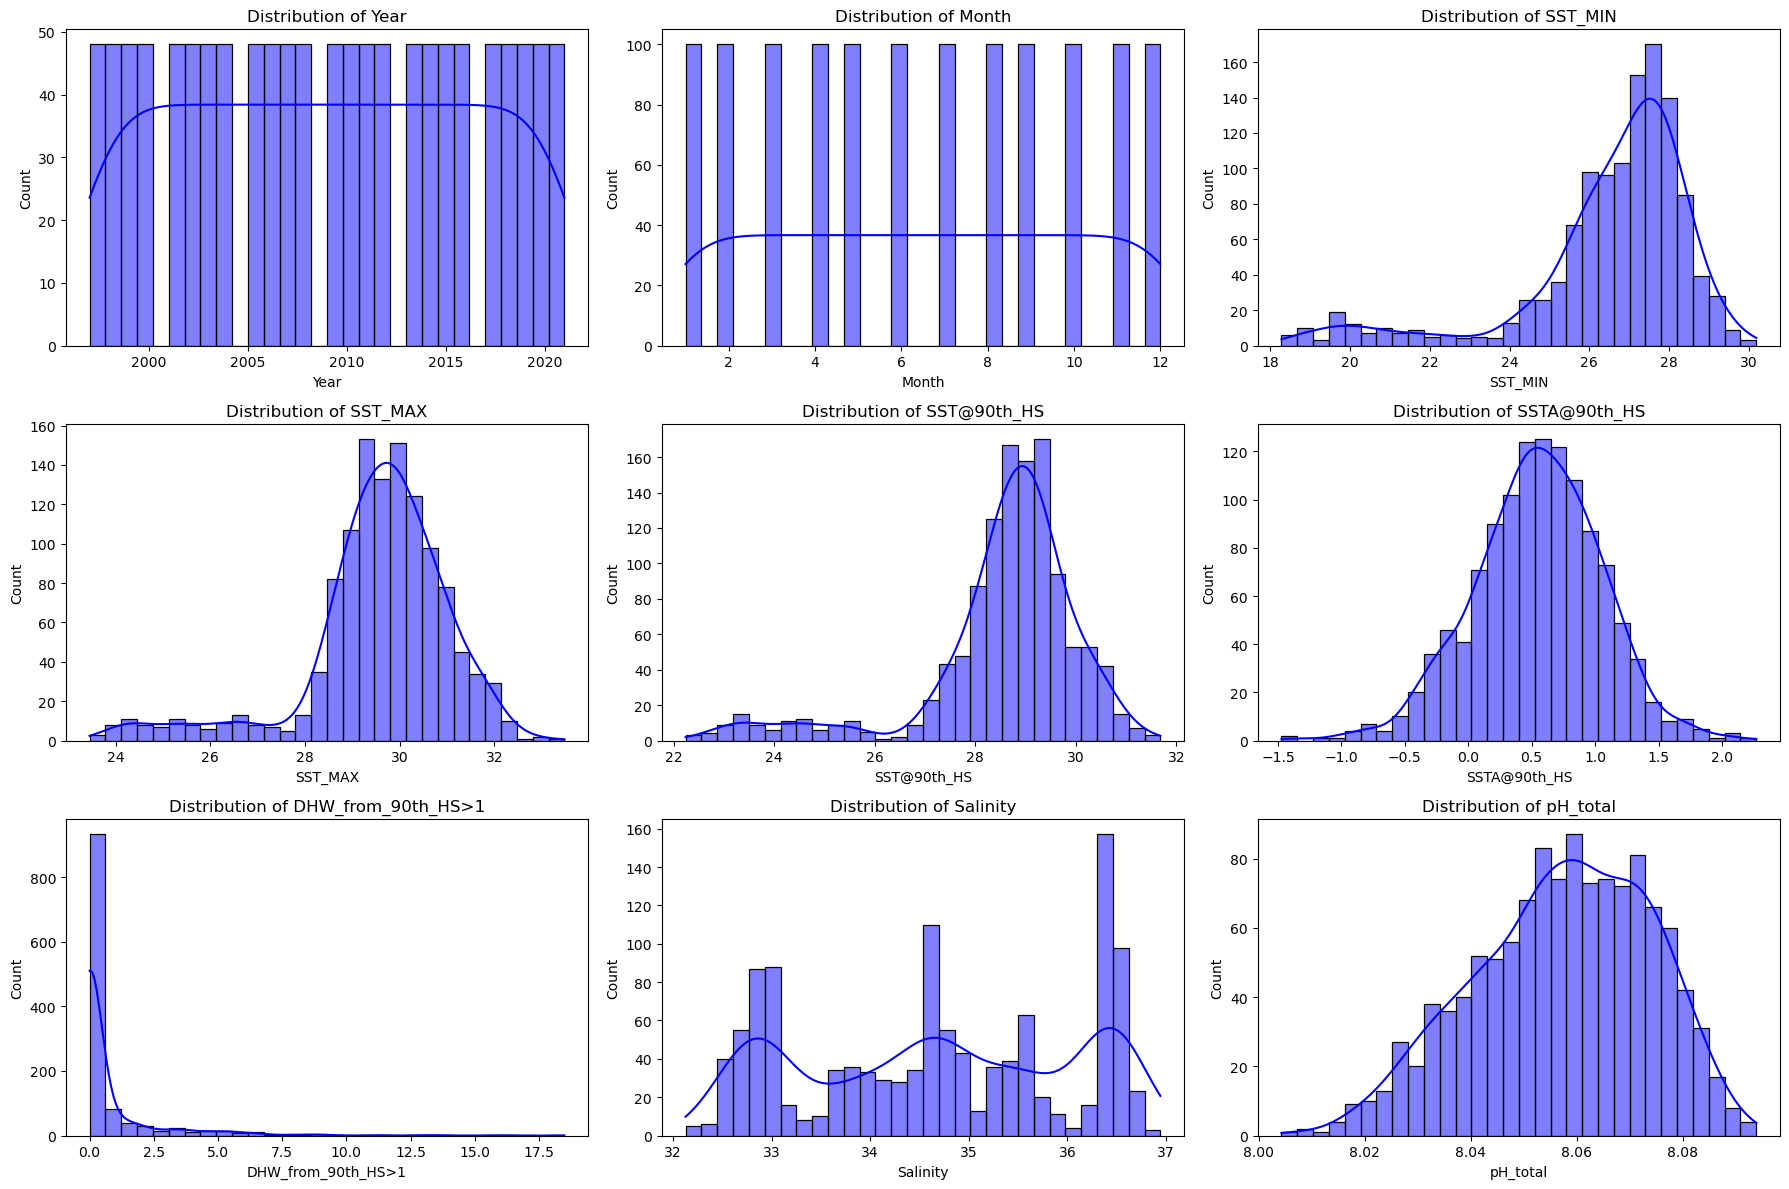

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
columns_to_plot = df.select_dtypes(include=[np.number]).columns[:9]
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color="blue")
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

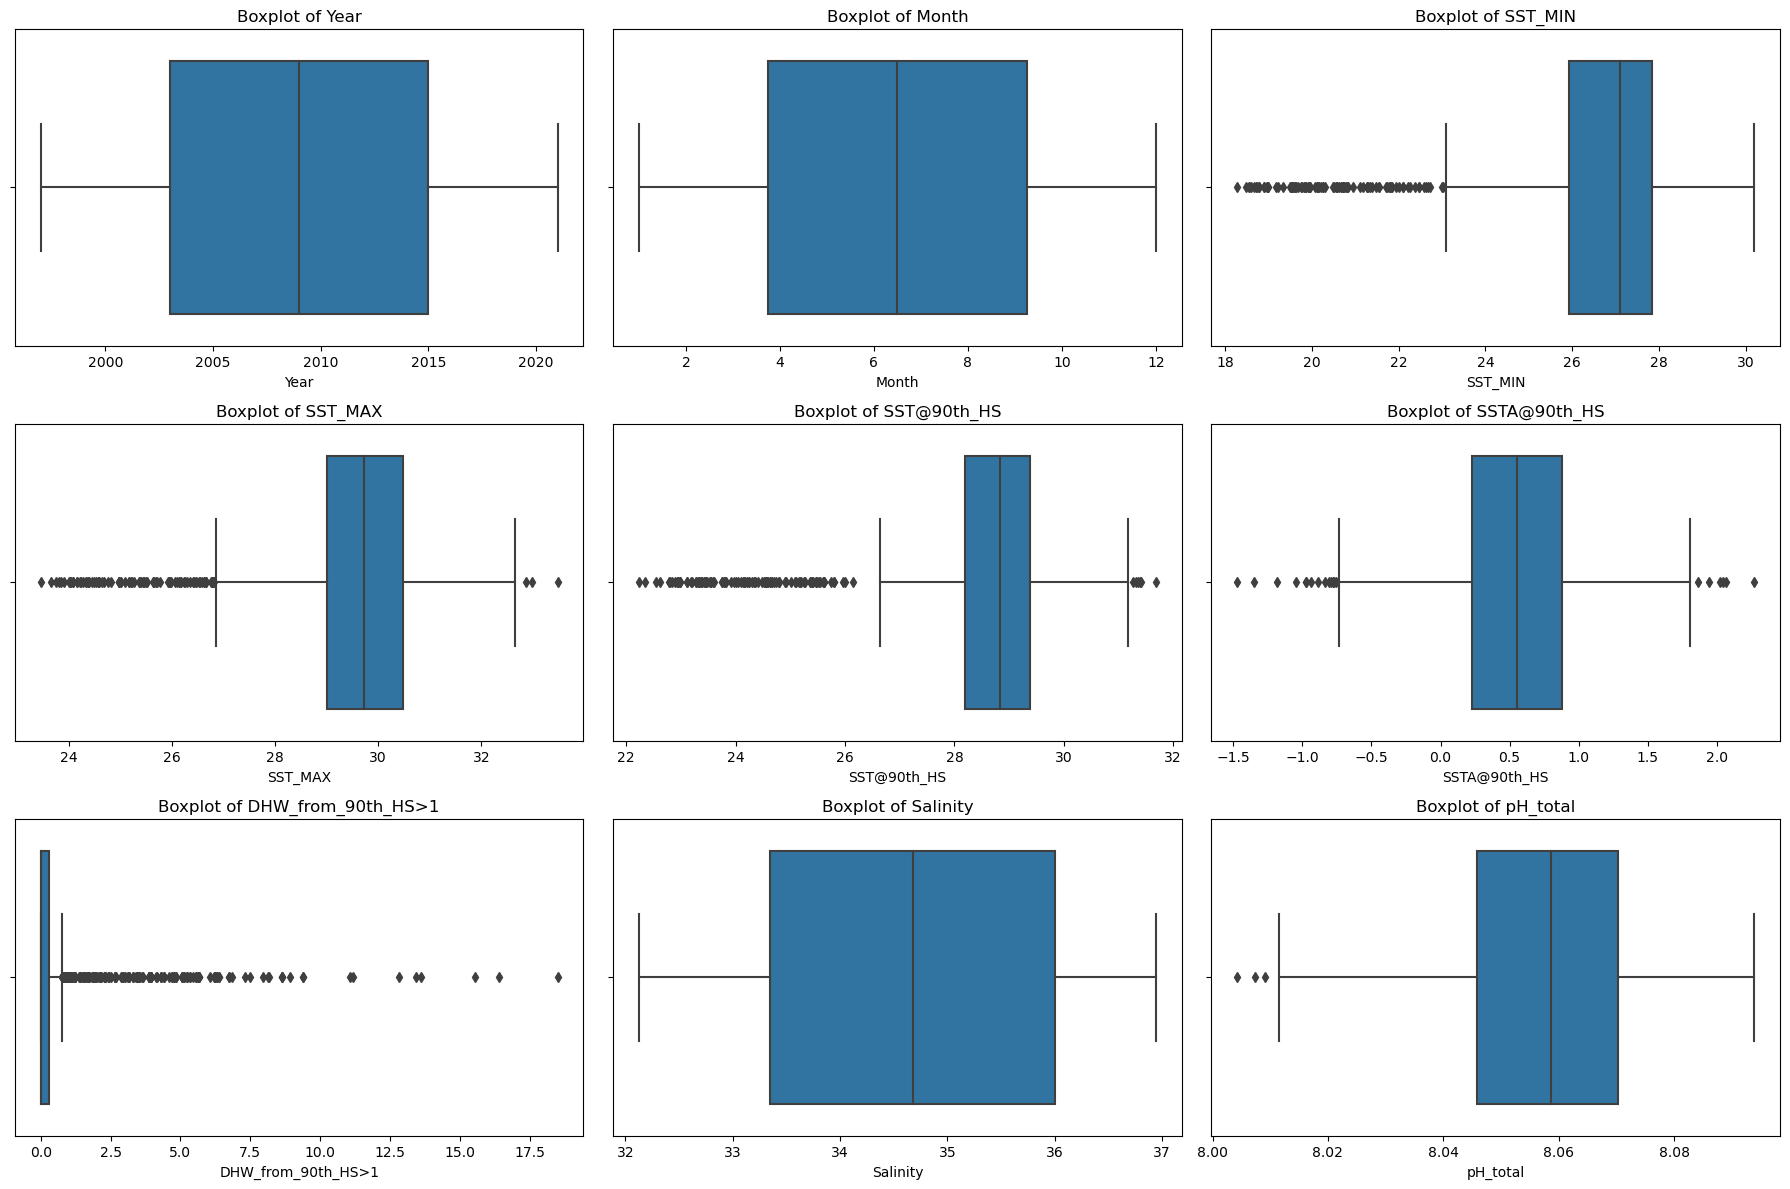

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

/var/folders/rh/12qqnf0d5871pn0c7924tqwc0000gn/T/ipykernel_86515/1985205203.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


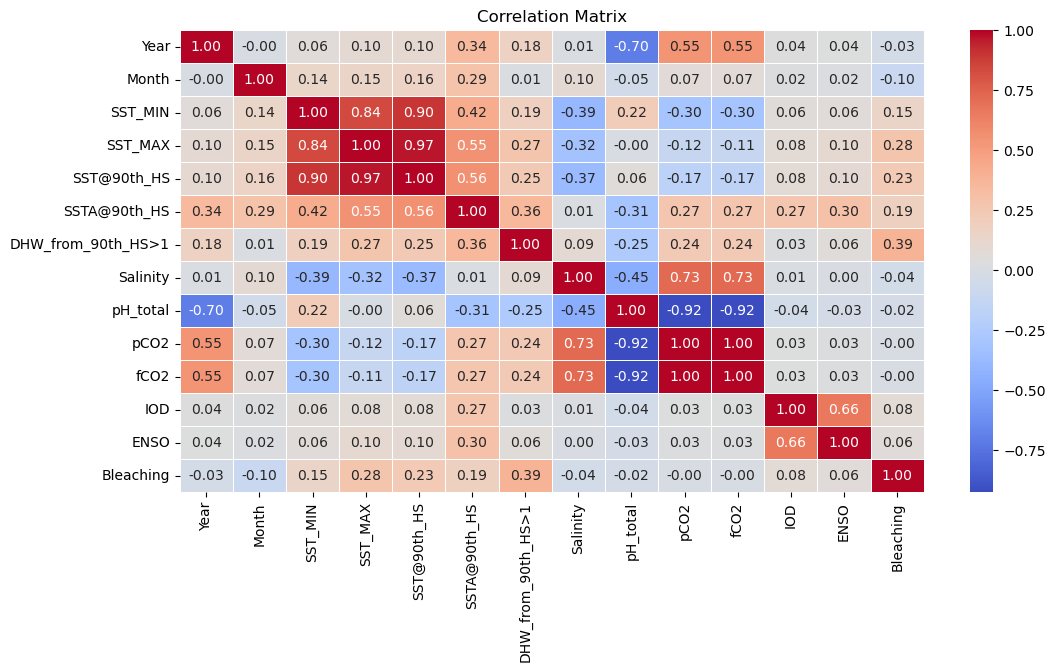

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

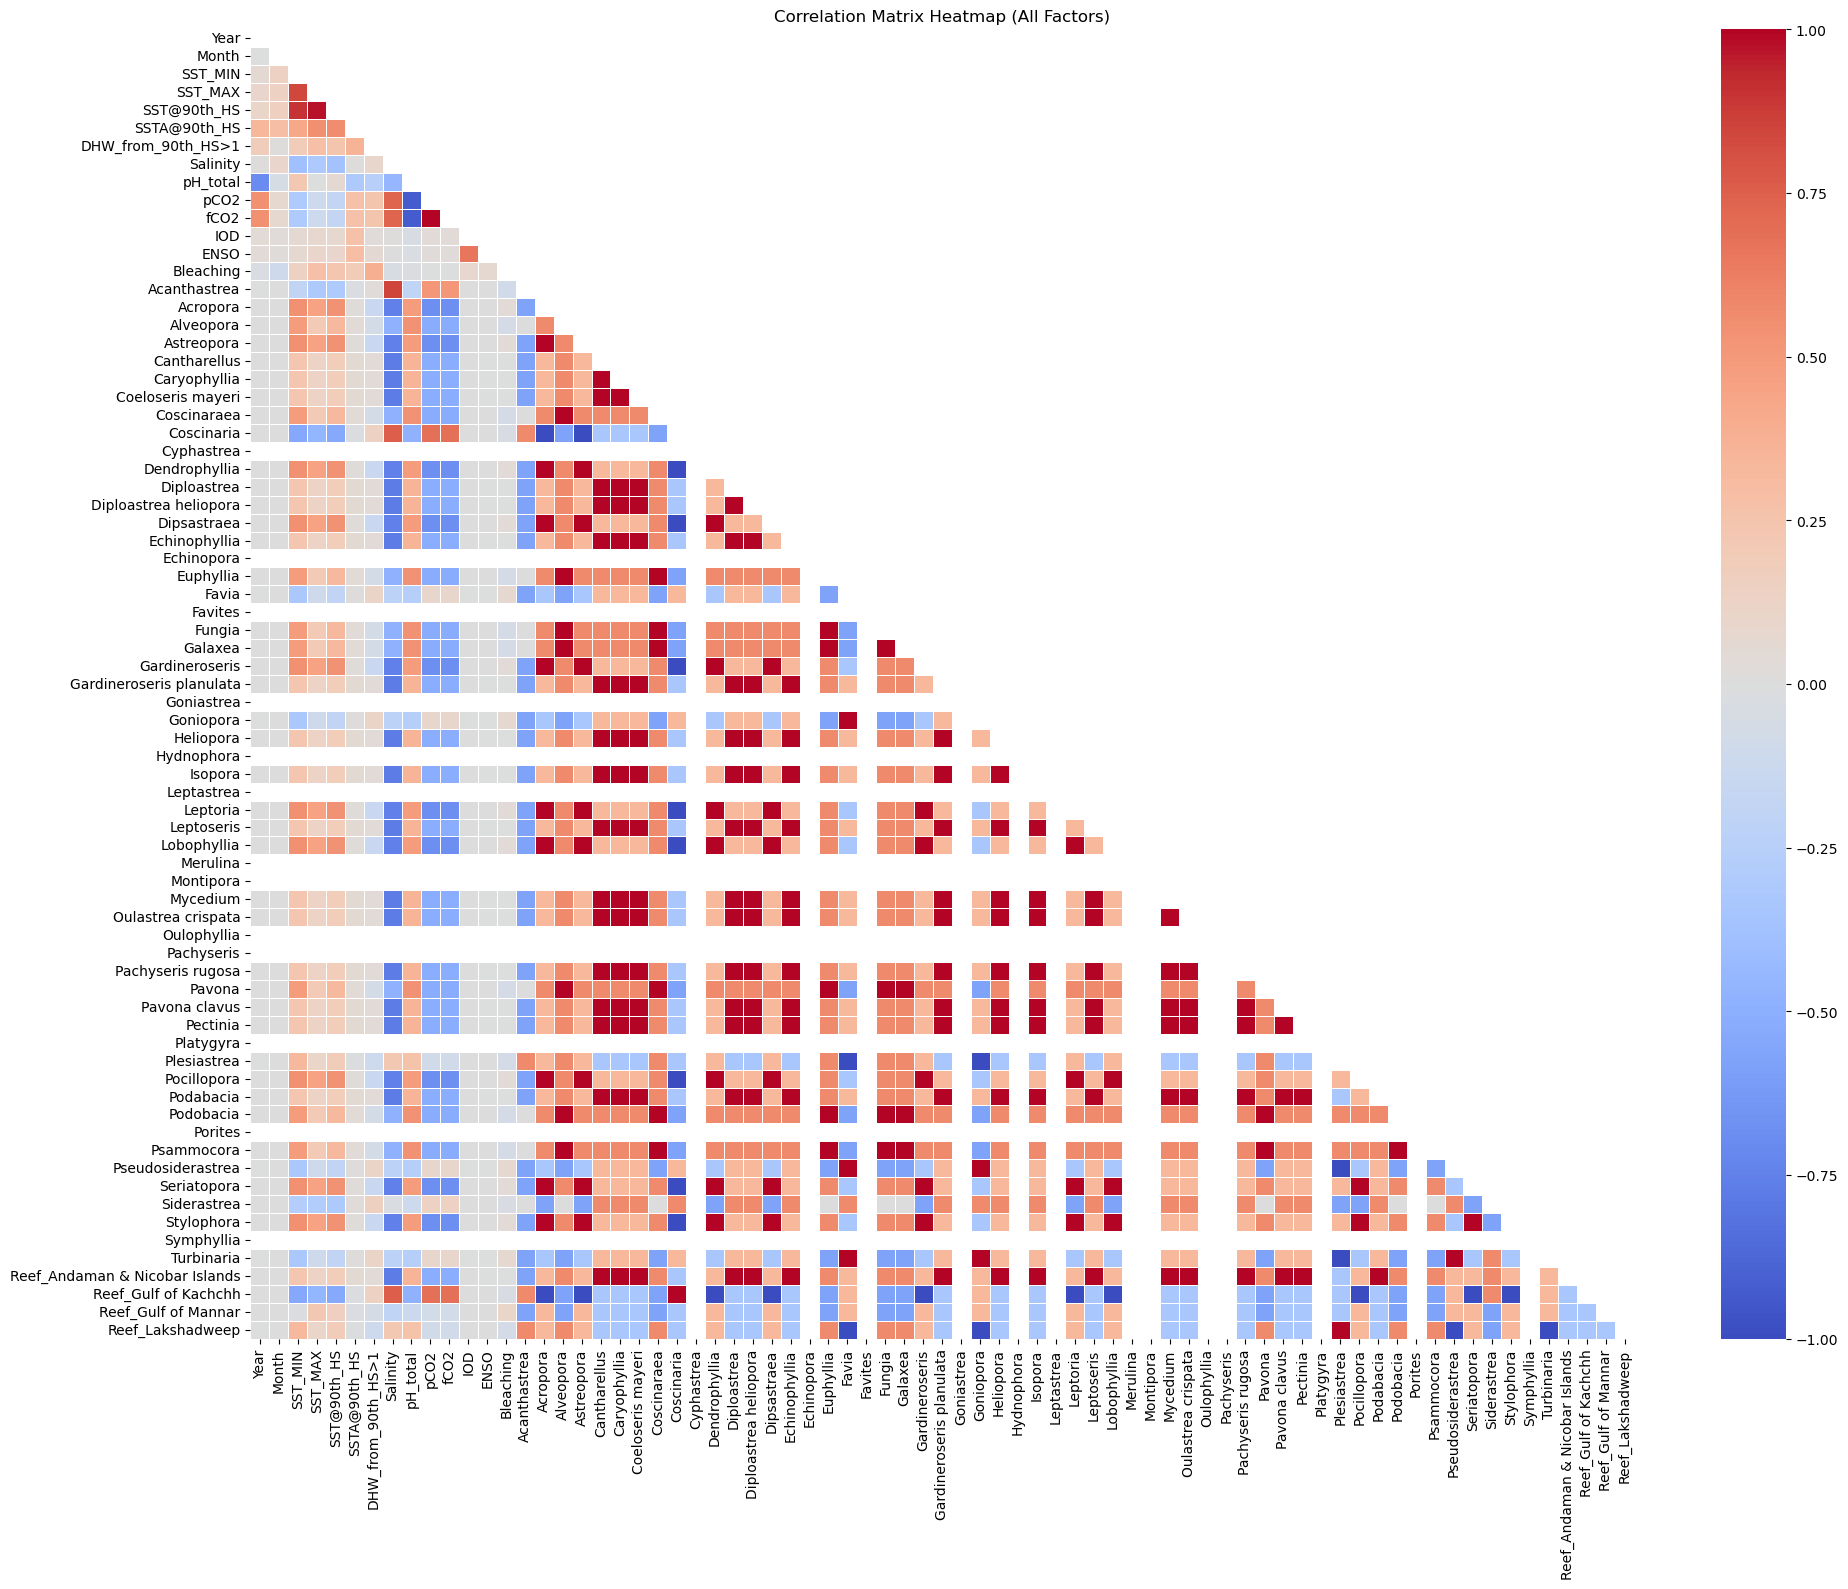

All correlations with Bleaching:
Bleaching             1.000000
DHW_from_90th_HS>1    0.387744
SST_MAX               0.276471
SST@90th_HS           0.234477
SSTA@90th_HS          0.187816
                        ...   
Oulophyllia                NaN
Pachyseris                 NaN
Platygyra                  NaN
Porites                    NaN
Symphyllia                 NaN
Name: Bleaching, Length: 73, dtype: float64


In [ ]:
file_path = "/Users/owlxshri/desktop/coral reef/mlpr-project/statisticalinf/finaldata_onehot.csv"
df = pd.read_csv(file_path)

df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])


reef_dummies = pd.get_dummies(df['Reef Name'], prefix='Reef')
df = pd.concat([df, reef_dummies], axis=1)


df_numeric = df.drop(columns=['Reef Name'])


corr_matrix = df_numeric.corr()


plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,  
    linewidths=0.5,
    mask=mask,    
    vmin=-1,
    vmax=1
)

plt.title("Correlation Matrix Heatmap (All Factors) With Species")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


bleaching_correlations = corr_matrix['Bleaching'].sort_values(ascending=False)
print("All correlations with Bleaching:")
print(bleaching_correlations)  


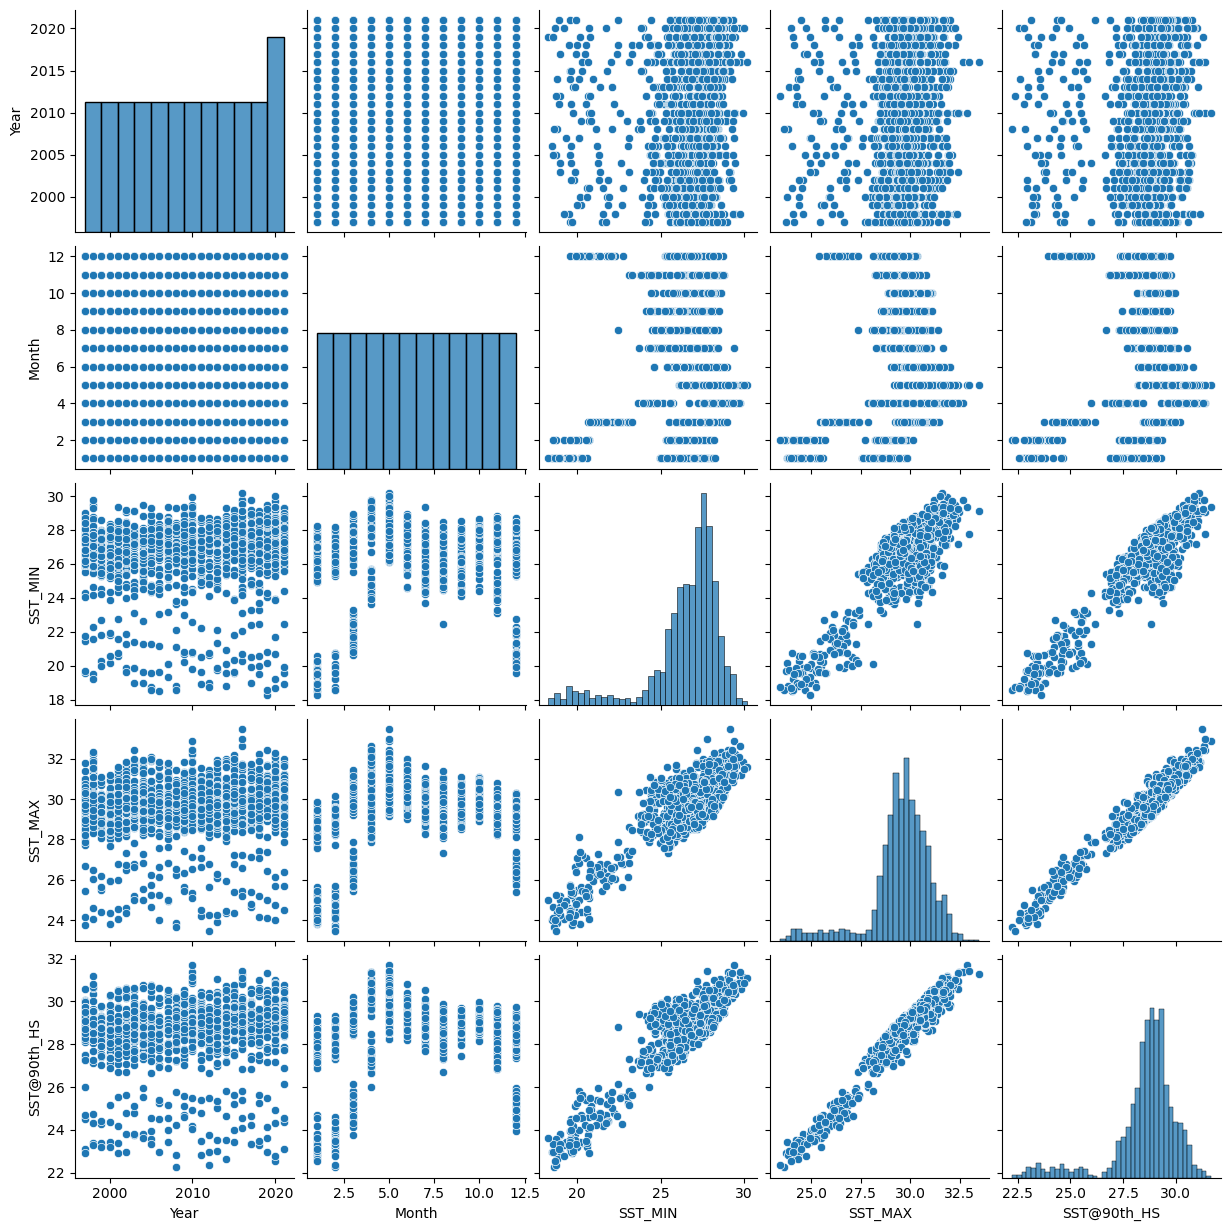

In [23]:
sns.pairplot(df[columns_to_plot[:5]])  # Plot first 5 numerical columns
plt.show()

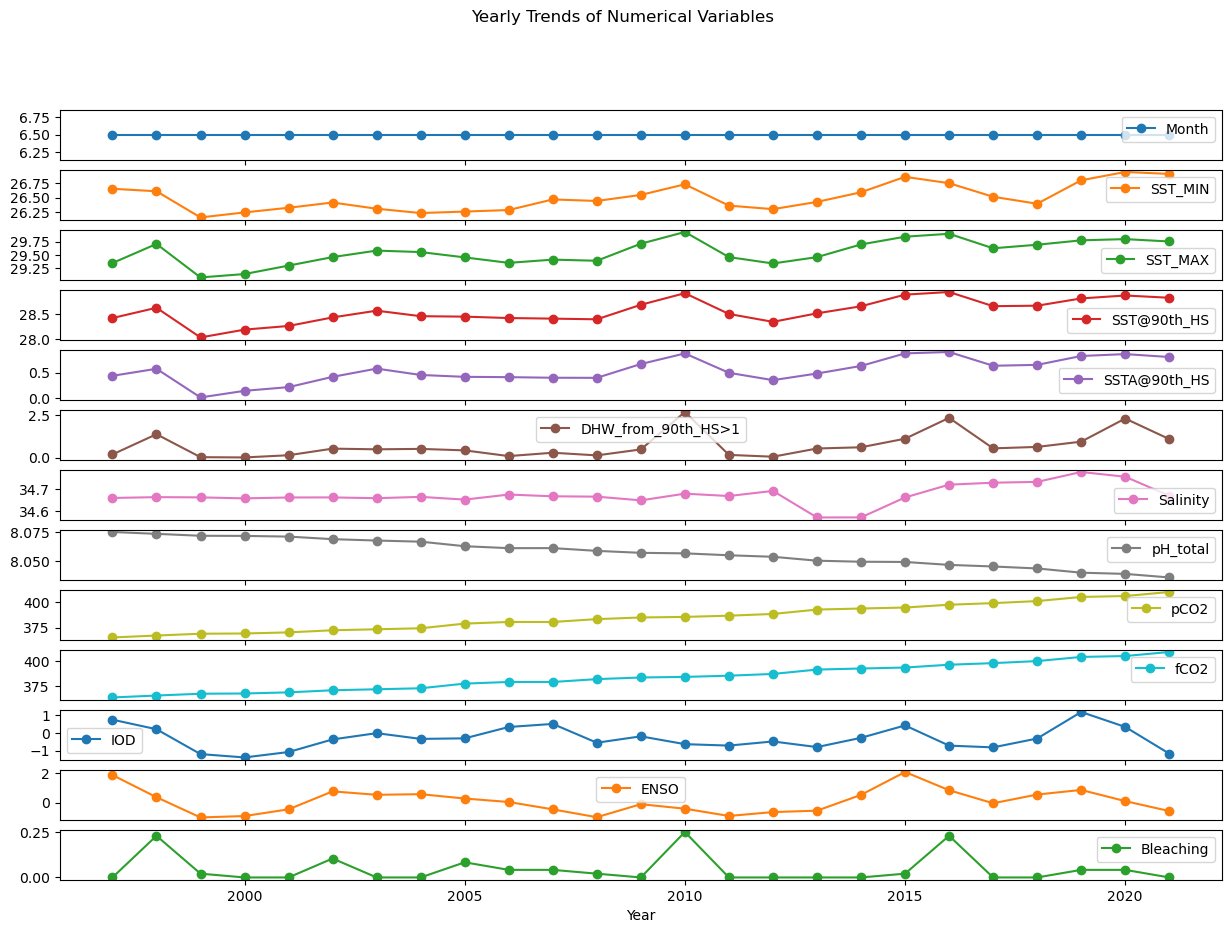

In [24]:
if 'Year' in df.columns:
    df_yearly = df.groupby("Year").mean(numeric_only=True)
    df_yearly.plot(subplots=True, figsize=(15, 10), marker="o")
    plt.suptitle("Yearly Trends of Numerical Variables")
    plt.show()

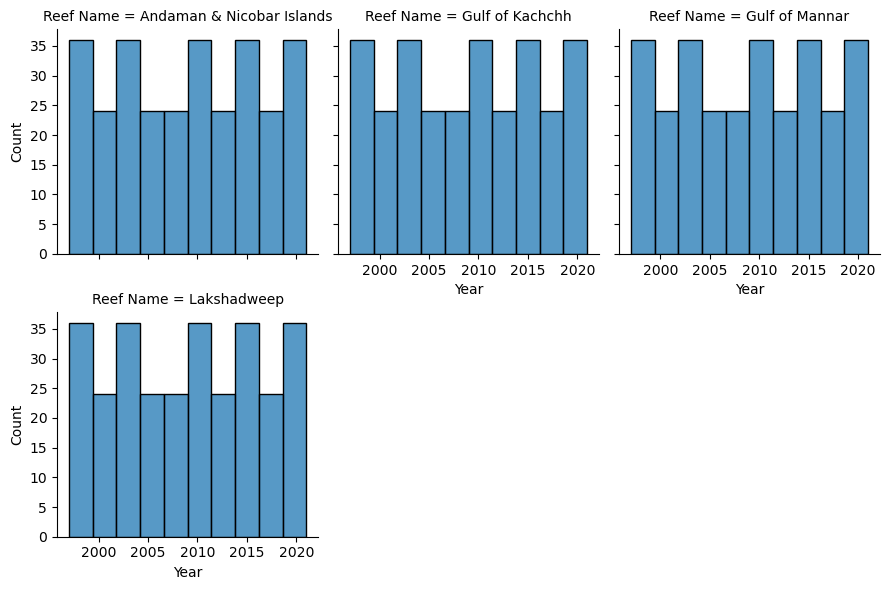

In [25]:
cat_columns = df.select_dtypes(include=['object']).columns
if len(cat_columns) > 0:
    grid = sns.FacetGrid(df, col=cat_columns[0], col_wrap=3)
    grid.map(sns.histplot, columns_to_plot[0])
    plt.show()

In [26]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)
print("\nStandardized Numerical Data Preview:")
print(df_scaled.head())


Standardized Numerical Data Preview:
       Year     Month   SST_MIN   SST_MAX  SST@90th_HS  SSTA@90th_HS  \
0 -1.664101 -1.593255 -0.302482 -1.022485    -0.660337     -1.304966   
1 -1.664101 -1.593255 -3.189058 -3.490507    -3.435800     -2.025873   
2 -1.664101 -1.593255 -0.320839 -1.093741    -0.814915     -1.382868   
3 -1.664101 -1.593255  0.362944 -0.536654    -0.189875     -0.783675   
4 -1.664101 -1.303572 -0.440157 -1.177951    -0.772811     -1.994525   

   DHW_from_90th_HS>1  Salinity  pH_total      pCO2      fCO2       IOD  \
0            -0.38295 -1.444566  2.021740 -1.927621 -1.928222 -0.521669   
1            -0.38295  1.273395  0.286051  0.253430  0.251024 -0.521669   
2            -0.38295 -0.799537  1.234660 -1.714408 -1.715244 -0.521669   
3            -0.38295  0.223823  1.497416 -1.020743 -1.020768 -0.521669   
4            -0.38295 -1.386382  2.207285 -1.943935 -1.944449 -0.807859   

       ENSO  Bleaching  
0  0.104864  -0.217072  
1  0.104864  -0.217072  
2  

In [27]:
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(12, 8))
    sc = plt.scatter(df["Longitude"], df["Latitude"], c=df.get("pCO2", pd.Series()), cmap="coolwarm", alpha=0.7, edgecolors="k")
    plt.colorbar(sc, label="pCO₂ Levels")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geospatial Distribution of pCO₂")
    plt.show()